In [205]:
import prophet
# Read in datasets
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

USA_train_imputed = pd.read_csv("USA_train.csv")
USA_test_imputed = pd.read_csv("USA_test.csv")
USA_train_imputed.set_index('date', inplace=True)
USA_test_imputed.set_index('date', inplace=True)

Brazil_train_imputed = pd.read_csv("Brazil_train.csv")
Brazil_test_imputed = pd.read_csv("Brazil_test.csv")
Brazil_train_imputed.set_index('date', inplace=True)
Brazil_test_imputed.set_index('date', inplace=True)

Germany_train_imputed = pd.read_csv("Germany_train.csv")
Germany_test_imputed = pd.read_csv("Germany_test.csv")
Germany_train_imputed.set_index('date', inplace=True)
Germany_test_imputed.set_index('date', inplace=True)

Nigeria_train_imputed = pd.read_csv("Nigeria_train.csv")
Nigeria_test_imputed = pd.read_csv("Nigeria_test.csv")
Nigeria_train_imputed.set_index('date', inplace=True)
Nigeria_test_imputed.set_index('date', inplace=True)

China_train_imputed = pd.read_csv("China_train.csv")
China_test_imputed = pd.read_csv("China_test.csv")
China_train_imputed.set_index('date', inplace=True)
China_test_imputed.set_index('date', inplace=True)

Australia_train_imputed = pd.read_csv("Australia_train.csv")
Australia_test_imputed = pd.read_csv("Australia_test.csv")
Australia_train_imputed.set_index('date', inplace=True)
Australia_test_imputed.set_index('date', inplace=True)

### USA

In [169]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import mean_squared_error

USA_train_imputed.index = pd.to_datetime(USA_train_imputed.index)
USA_test_imputed.index = pd.to_datetime(USA_test_imputed.index)

In [170]:
# Drop Columns that are constant for all dates as they will have no effect on data
# Fix Lag Columns so values at beginning ar 0 not NaN and values in test dataset are those of last values in train
USA_train_imputed = USA_train_imputed.drop(columns=['iso_code', 'population_density'
                                                                             ,'median_age', 'aged_65_older', 'aged_70_older',
                                                                             'gdp_per_capita','extreme_poverty',
                                                                              'cardiovasc_death_rate','hospital_beds_per_thousand',
                                                                             'life_expectancy','human_development_index','total_cases',
                                                                             'location', 'continent', 'population', 'reproduction_rate', 'new_cases_smoothed',
                                                                             'total_cases_per_million', 'new_cases_per_million', 'new_cases_smoothed_per_million', 'Rolling_Mean_new_cases'])
USA_train_imputed['new_cases_Lag_7'] = USA_train_imputed['new_cases_Lag_7'].fillna(0)
USA_train_imputed['new_cases_Lag_14'] = USA_train_imputed['new_cases_Lag_14'].fillna(0)
USA_train_imputed["Weekend"] = USA_train_imputed["Weekend"].astype(int)


USA_test_imputed = USA_test_imputed.drop(columns=['iso_code', 'population_density'
                                                                             ,'median_age', 'aged_65_older', 'aged_70_older',
                                                                             'gdp_per_capita','extreme_poverty',
                                                                              'cardiovasc_death_rate','hospital_beds_per_thousand',
                                                                             'life_expectancy','human_development_index','total_cases',
                                                                             'location', 'continent', 'population', 'reproduction_rate', 'new_cases_smoothed',
                                                                           'total_cases_per_million', 'new_cases_per_million', 'new_cases_smoothed_per_million', 'Rolling_Mean_new_cases'])
USA_test_imputed['new_cases_Lag_7'][0:7] = USA_train_imputed['new_cases'][-7:]
USA_test_imputed['new_cases_Lag_14'][0:14] = USA_train_imputed['new_cases'][-14:]
USA_test_imputed["Weekend"] = USA_test_imputed["Weekend"].astype(int)

In [171]:
# SCALE DATA
from sklearn.preprocessing import StandardScaler
USA_train_target = USA_train_imputed['new_cases']
USA_test_target = USA_test_imputed['new_cases']
USA_train_imputed = USA_train_imputed.drop(columns = ['new_cases'])
USA_test_imputed = USA_test_imputed.drop(columns = ['new_cases'])

scalerX = StandardScaler().fit(USA_train_imputed)
USA_train_scaled = scalerX.transform(USA_train_imputed)
USA_train_scaled = pd.DataFrame(USA_train_scaled, index=USA_train_imputed.index, columns=USA_train_imputed.columns)
USA_test_scaled = scalerX.transform(USA_test_imputed)
USA_test_scaled = pd.DataFrame(USA_test_scaled, index=USA_test_imputed.index, columns=USA_test_imputed.columns)

USA_train_scaled['new_cases'] = USA_train_target
USA_test_scaled['new_cases'] = USA_test_target

In [172]:
# ADD REGRESSORS AND FIT MODEL
model = prophet.Prophet(changepoint_prior_scale= 0.5, seasonality_prior_scale= 10.0, daily_seasonality=True, weekly_seasonality=True, yearly_seasonality=True, seasonality_mode = 'multiplicative', growth='linear')
for col in USA_train_scaled.columns:
    if col not in ['date', 'new_cases']:
        model.add_regressor(col)
model=model.fit(USA_train_scaled.reset_index().rename(columns={'date':'ds', 'new_cases':'y'}))

14:57:55 - cmdstanpy - INFO - Chain [1] start processing
14:57:56 - cmdstanpy - INFO - Chain [1] done processing


In [174]:
# Make training predictions and Train RMSE
train_pred=model.predict(USA_train_scaled.reset_index().rename(columns={'date':'ds', 'new_cases':'y'})).set_index('ds')
rmse = np.sqrt(mean_squared_error(train_pred['yhat'], USA_train_scaled['new_cases']))
rmse

16159.512455704304

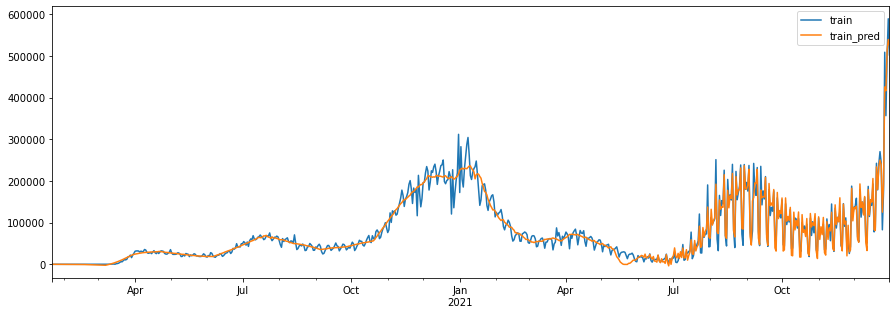

In [176]:
# Train Plot
pd.concat([USA_train_scaled['new_cases'],train_pred['yhat']], axis=1).plot(figsize=(15,5)) 
plt.legend(['train', 'train_pred'])

In [181]:
# Make testing predictions and Test RMSE
test_pred=model.predict(USA_test_scaled.reset_index().rename(columns={'date':'ds', 'new_cases':'y'})).set_index('ds')
rmse = np.sqrt(mean_squared_error(test_pred['yhat'], USA_test_scaled['new_cases']))
rmse

2982705.759478511

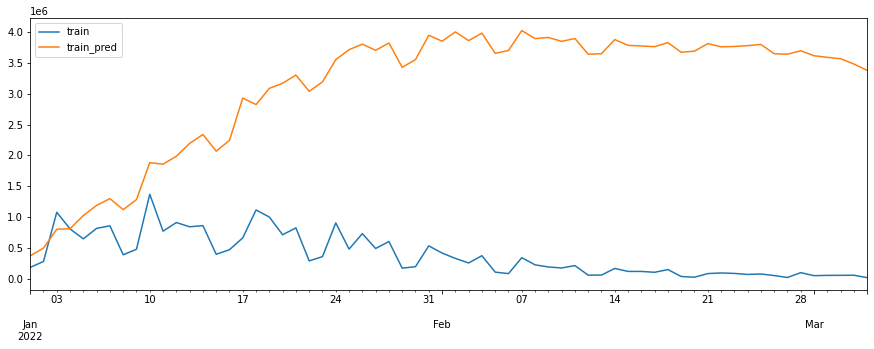

In [182]:
pd.concat([USA_test_scaled['new_cases'],test_pred['yhat']], axis=1).plot(figsize=(15,5)) 
plt.legend(['train', 'train_pred'])

### BRAZIL

In [184]:
Brazil_train_imputed.index = pd.to_datetime(Brazil_train_imputed.index)
Brazil_test_imputed.index = pd.to_datetime(Brazil_test_imputed.index)

In [185]:
# Drop Columns that are constant for all dates as they will have no effect on data
# Fix Lag Columns so values at beginning ar 0 not NaN and values in test dataset are those of last values in train
Brazil_train_imputed = Brazil_train_imputed.drop(columns=['iso_code', 'population_density'
                                                                             ,'median_age', 'aged_65_older', 'aged_70_older',
                                                                             'gdp_per_capita','extreme_poverty',
                                                                              'cardiovasc_death_rate','hospital_beds_per_thousand',
                                                                             'life_expectancy','human_development_index','total_cases',
                                                                             'location', 'continent', 'population', 'reproduction_rate', 'new_cases_smoothed',
                                                                             'total_cases_per_million', 'new_cases_per_million', 'new_cases_smoothed_per_million', 'Rolling_Mean_new_cases'])
Brazil_train_imputed['new_cases_Lag_7'] = Brazil_train_imputed['new_cases_Lag_7'].fillna(0)
Brazil_train_imputed['new_cases_Lag_14'] = Brazil_train_imputed['new_cases_Lag_14'].fillna(0)
Brazil_train_imputed["Weekend"] = Brazil_train_imputed["Weekend"].astype(int)


Brazil_test_imputed = Brazil_test_imputed.drop(columns=['iso_code', 'population_density'
                                                                             ,'median_age', 'aged_65_older', 'aged_70_older',
                                                                             'gdp_per_capita','extreme_poverty',
                                                                              'cardiovasc_death_rate','hospital_beds_per_thousand',
                                                                             'life_expectancy','human_development_index','total_cases',
                                                                             'location', 'continent', 'population', 'reproduction_rate', 'new_cases_smoothed',
                                                                           'total_cases_per_million', 'new_cases_per_million', 'new_cases_smoothed_per_million', 'Rolling_Mean_new_cases'])
Brazil_test_imputed['new_cases_Lag_7'][0:7] = Brazil_train_imputed['new_cases'][-7:]
Brazil_test_imputed['new_cases_Lag_14'][0:14] = Brazil_train_imputed['new_cases'][-14:]
Brazil_test_imputed["Weekend"] = Brazil_test_imputed["Weekend"].astype(int)


In [186]:
# SCALE DATA
Brazil_train_target = Brazil_train_imputed['new_cases']
Brazil_test_target = Brazil_test_imputed['new_cases']
Brazil_train_imputed = Brazil_train_imputed.drop(columns=['new_cases'])
Brazil_test_imputed = Brazil_test_imputed.drop(columns=['new_cases'])

scalerX = StandardScaler().fit(Brazil_train_imputed)
Brazil_train_scaled = scalerX.transform(Brazil_train_imputed)
Brazil_train_scaled = pd.DataFrame(Brazil_train_scaled, index=Brazil_train_imputed.index, columns=Brazil_train_imputed.columns)
Brazil_test_scaled = scalerX.transform(Brazil_test_imputed)
Brazil_test_scaled = pd.DataFrame(Brazil_test_scaled, index=Brazil_test_imputed.index, columns=Brazil_test_imputed.columns)

Brazil_train_scaled['new_cases'] = Brazil_train_target
Brazil_test_scaled['new_cases'] = Brazil_test_target


In [187]:
# ADD REGRESSORS AND FIT MODEL
model = prophet.Prophet(changepoint_prior_scale= 0.5, seasonality_prior_scale= 10.0, daily_seasonality=True, weekly_seasonality=True, yearly_seasonality=True, seasonality_mode = 'multiplicative', growth='linear')
for col in Brazil_train_scaled.columns:
    if col not in ['date', 'new_cases']:
        model.add_regressor(col)
model=model.fit(Brazil_train_scaled.reset_index().rename(columns={'date':'ds', 'new_cases':'y'}))


17:16:55 - cmdstanpy - INFO - Chain [1] start processing
17:16:55 - cmdstanpy - INFO - Chain [1] done processing


In [188]:
# Make training predictions and Train RMSE
train_pred = model.predict(Brazil_train_scaled.reset_index().rename(columns={'date':'ds', 'new_cases':'y'})).set_index('ds')
rmse = np.sqrt(mean_squared_error(train_pred['yhat'], Brazil_train_scaled['new_cases']))
rmse


6000.958778090501

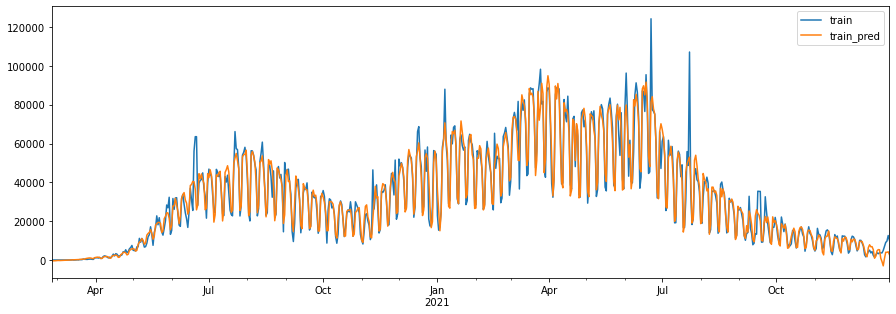

In [189]:
# Train Plot
pd.concat([Brazil_train_scaled['new_cases'], train_pred['yhat']], axis=1).plot(figsize=(15, 5))
plt.legend(['train', 'train_pred'])


In [190]:
# Make testing predictions and Test RMSE
test_pred = model.predict(Brazil_test_scaled.reset_index().rename(columns={'date':'ds', 'new_cases':'y'})).set_index('ds')
rmse = np.sqrt(mean_squared_error(test_pred['yhat'], Brazil_test_scaled['new_cases']))
rmse


123881.66939515327

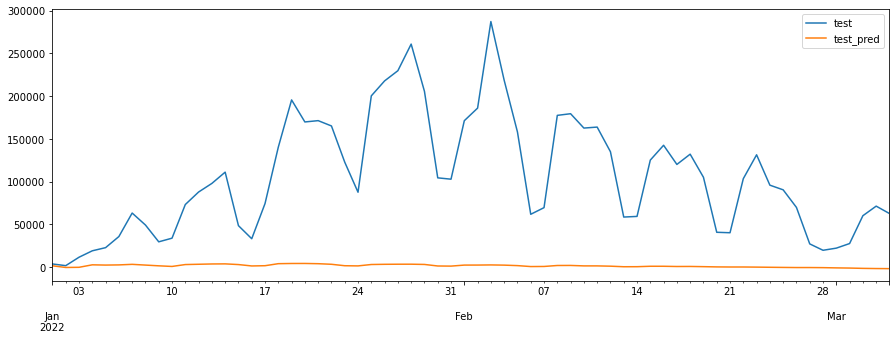

In [191]:
pd.concat([Brazil_test_scaled['new_cases'], test_pred['yhat']], axis=1).plot(figsize=(15, 5))
plt.legend(['test', 'test_pred'])


### GERMANY

In [195]:
Germany_train_imputed.index = pd.to_datetime(Germany_train_imputed.index)
Germany_test_imputed.index = pd.to_datetime(Germany_test_imputed.index)


In [196]:
# Drop Columns that are constant for all dates as they will have no effect on data
# Fix Lag Columns so values at beginning ar 0 not NaN and values in test dataset are those of last values in train
Germany_train_imputed = Germany_train_imputed.drop(columns=['iso_code', 'population_density'
                                                                             ,'median_age', 'aged_65_older', 'aged_70_older',
                                                                             'gdp_per_capita',
                                                                              'cardiovasc_death_rate','hospital_beds_per_thousand',
                                                                             'life_expectancy','human_development_index','total_cases',
                                                                             'location', 'continent', 'population', 'reproduction_rate', 'new_cases_smoothed',
                                                                             'total_cases_per_million', 'new_cases_per_million', 'new_cases_smoothed_per_million', 'Rolling_Mean_new_cases'])
Germany_train_imputed['new_cases_Lag_7'] = Germany_train_imputed['new_cases_Lag_7'].fillna(0)
Germany_train_imputed['new_cases_Lag_14'] = Germany_train_imputed['new_cases_Lag_14'].fillna(0)
Germany_train_imputed["Weekend"] = Germany_train_imputed["Weekend"].astype(int)


Germany_test_imputed = Germany_test_imputed.drop(columns=['iso_code', 'population_density'
                                                                             ,'median_age', 'aged_65_older', 'aged_70_older',
                                                                             'gdp_per_capita',
                                                                              'cardiovasc_death_rate','hospital_beds_per_thousand',
                                                                             'life_expectancy','human_development_index','total_cases',
                                                                             'location', 'continent', 'population', 'reproduction_rate', 'new_cases_smoothed',
                                                                           'total_cases_per_million', 'new_cases_per_million', 'new_cases_smoothed_per_million', 'Rolling_Mean_new_cases'])
Germany_test_imputed['new_cases_Lag_7'][0:7] = Germany_train_imputed['new_cases'][-7:]
Germany_test_imputed['new_cases_Lag_14'][0:14] = Germany_train_imputed['new_cases'][-14:]
Germany_test_imputed["Weekend"] = Germany_test_imputed["Weekend"].astype(int)


In [197]:
# SCALE DATA
Germany_train_target = Germany_train_imputed['new_cases']
Germany_test_target = Germany_test_imputed['new_cases']
Germany_train_imputed = Germany_train_imputed.drop(columns=['new_cases'])
Germany_test_imputed = Germany_test_imputed.drop(columns=['new_cases'])

scalerX = StandardScaler().fit(Germany_train_imputed)
Germany_train_scaled = scalerX.transform(Germany_train_imputed)
Germany_train_scaled = pd.DataFrame(Germany_train_scaled, index=Germany_train_imputed.index, columns=Germany_train_imputed.columns)
Germany_test_scaled = scalerX.transform(Germany_test_imputed)
Germany_test_scaled = pd.DataFrame(Germany_test_scaled, index=Germany_test_imputed.index, columns=Germany_test_imputed.columns)

Germany_train_scaled['new_cases'] = Germany_train_target
Germany_test_scaled['new_cases'] = Germany_test_target


In [198]:
# ADD REGRESSORS AND FIT MODEL
model = prophet.Prophet(changepoint_prior_scale= 0.5, seasonality_prior_scale= 10.0, daily_seasonality=True, weekly_seasonality=True, yearly_seasonality=True, seasonality_mode = 'multiplicative', growth='linear')
for col in Germany_train_scaled.columns:
    if col not in ['date', 'new_cases']:
        model.add_regressor(col)
model=model.fit(Germany_train_scaled.reset_index().rename(columns={'date':'ds', 'new_cases':'y'}))


17:17:39 - cmdstanpy - INFO - Chain [1] start processing
17:17:39 - cmdstanpy - INFO - Chain [1] done processing


In [199]:
# Make training predictions and Train RMSE
train_pred = model.predict(Germany_train_scaled.reset_index().rename(columns={'date':'ds', 'new_cases':'y'})).set_index('ds')
rmse = np.sqrt(mean_squared_error(train_pred['yhat'], Germany_train_scaled['new_cases']))
rmse


3648.717203383376

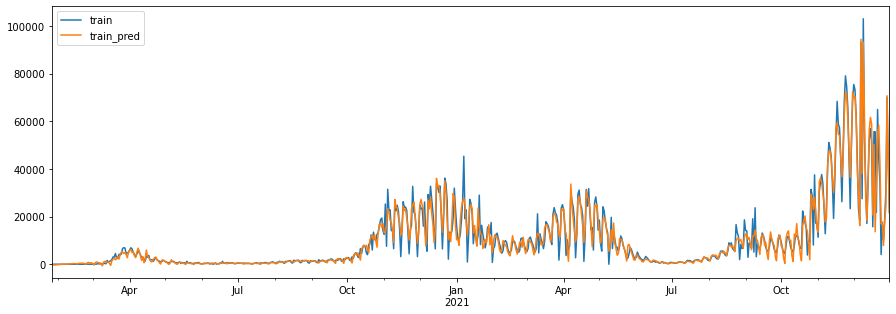

In [200]:
# Train Plot
pd.concat([Germany_train_scaled['new_cases'], train_pred['yhat']], axis=1).plot(figsize=(15, 5))
plt.legend(['train', 'train_pred'])


In [201]:
# Make testing predictions and Test RMSE
test_pred = model.predict(Germany_test_scaled.reset_index().rename(columns={'date':'ds', 'new_cases':'y'})).set_index('ds')
rmse = np.sqrt(mean_squared_error(test_pred['yhat'], Germany_test_scaled['new_cases']))
rmse


78022.781973792

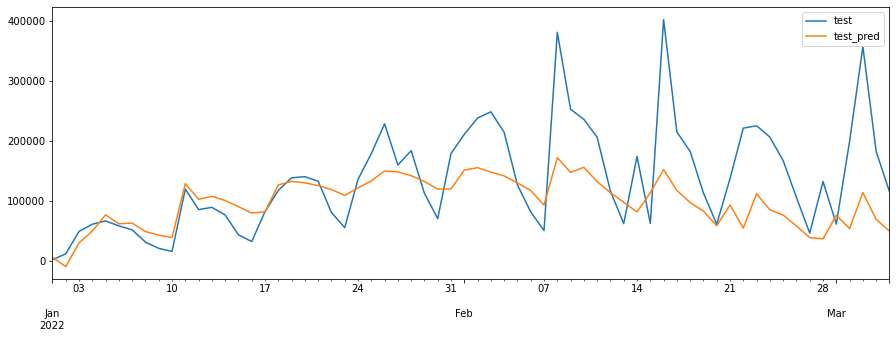

In [202]:
pd.concat([Germany_test_scaled['new_cases'], test_pred['yhat']], axis=1).plot(figsize=(15, 5))
plt.legend(['test', 'test_pred'])



### NIGERIA

In [206]:
Nigeria_train_imputed.index = pd.to_datetime(Nigeria_train_imputed.index)
Nigeria_test_imputed.index = pd.to_datetime(Nigeria_test_imputed.index)


In [207]:
# Drop Columns that are constant for all dates as they will have no effect on data
# Fix Lag Columns so values at beginning ar 0 not NaN and values in test dataset are those of last values in train
Nigeria_train_imputed = Nigeria_train_imputed.drop(columns=['iso_code', 'population_density'
                                                                             ,'median_age', 'aged_65_older', 'aged_70_older',
                                                                             'gdp_per_capita',
                                                                              'cardiovasc_death_rate',
                                                                             'life_expectancy','human_development_index','total_cases',
                                                                             'location', 'continent', 'population', 'reproduction_rate', 'new_cases_smoothed',
                                                                             'total_cases_per_million', 'new_cases_per_million', 'new_cases_smoothed_per_million', 'Rolling_Mean_new_cases'])
Nigeria_train_imputed['new_cases_Lag_7'] = Nigeria_train_imputed['new_cases_Lag_7'].fillna(0)
Nigeria_train_imputed['new_cases_Lag_14'] = Nigeria_train_imputed['new_cases_Lag_14'].fillna(0)
Nigeria_train_imputed["Weekend"] = Nigeria_train_imputed["Weekend"].astype(int)


Nigeria_test_imputed = Nigeria_test_imputed.drop(columns=['iso_code', 'population_density'
                                                                             ,'median_age', 'aged_65_older', 'aged_70_older',
                                                                             'gdp_per_capita',
                                                                              'cardiovasc_death_rate',
                                                                             'life_expectancy','human_development_index','total_cases',
                                                                             'location', 'continent', 'population', 'reproduction_rate', 'new_cases_smoothed',
                                                                           'total_cases_per_million', 'new_cases_per_million', 'new_cases_smoothed_per_million', 'Rolling_Mean_new_cases'])
Nigeria_test_imputed['new_cases_Lag_7'][0:7] = Nigeria_train_imputed['new_cases'][-7:]
Nigeria_test_imputed['new_cases_Lag_14'][0:14] = Nigeria_train_imputed['new_cases'][-14:]
Nigeria_test_imputed["Weekend"] = Nigeria_test_imputed["Weekend"].astype(int)


In [208]:
# SCALE DATA
Nigeria_train_target = Nigeria_train_imputed['new_cases']
Nigeria_test_target = Nigeria_test_imputed['new_cases']
Nigeria_train_imputed = Nigeria_train_imputed.drop(columns=['new_cases'])
Nigeria_test_imputed = Nigeria_test_imputed.drop(columns=['new_cases'])

scalerX = StandardScaler().fit(Nigeria_train_imputed)
Nigeria_train_scaled = scalerX.transform(Nigeria_train_imputed)
Nigeria_train_scaled = pd.DataFrame(Nigeria_train_scaled, index=Nigeria_train_imputed.index, columns=Nigeria_train_imputed.columns)
Nigeria_test_scaled = scalerX.transform(Nigeria_test_imputed)
Nigeria_test_scaled = pd.DataFrame(Nigeria_test_scaled, index=Nigeria_test_imputed.index, columns=Nigeria_test_imputed.columns)

Nigeria_train_scaled['new_cases'] = Nigeria_train_target
Nigeria_test_scaled['new_cases'] = Nigeria_test_target


In [209]:
# ADD REGRESSORS AND FIT MODEL
model = prophet.Prophet(changepoint_prior_scale= 0.5, seasonality_prior_scale= 10.0, daily_seasonality=True, weekly_seasonality=True, yearly_seasonality=True, seasonality_mode = 'multiplicative', growth='linear')
for col in Nigeria_train_scaled.columns:
    if col not in ['date', 'new_cases']:
        model.add_regressor(col)
model=model.fit(Nigeria_train_scaled.reset_index().rename(columns={'date':'ds', 'new_cases':'y'}))


17:18:32 - cmdstanpy - INFO - Chain [1] start processing
17:18:33 - cmdstanpy - INFO - Chain [1] done processing


In [210]:
# Make training predictions and Train RMSE
train_pred = model.predict(Nigeria_train_scaled.reset_index().rename(columns={'date':'ds', 'new_cases':'y'})).set_index('ds')
rmse = np.sqrt(mean_squared_error(train_pred['yhat'], Nigeria_train_scaled['new_cases']))
rmse


218.6379518235315

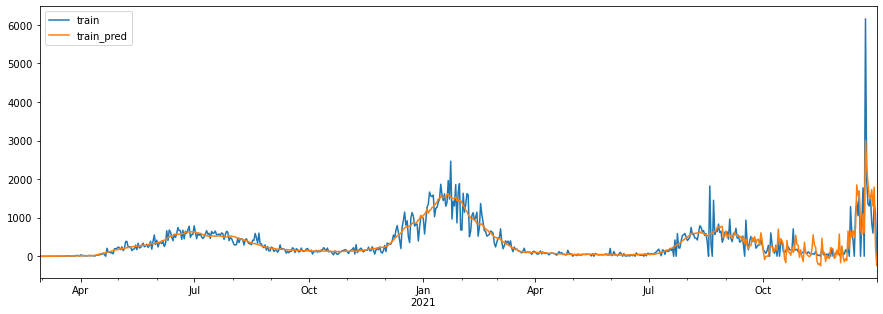

In [211]:
# Train Plot
pd.concat([Nigeria_train_scaled['new_cases'], train_pred['yhat']], axis=1).plot(figsize=(15, 5))
plt.legend(['train', 'train_pred'])


In [212]:
# Make testing predictions and Test RMSE
test_pred = model.predict(Nigeria_test_scaled.reset_index().rename(columns={'date':'ds', 'new_cases':'y'})).set_index('ds')
rmse = np.sqrt(mean_squared_error(test_pred['yhat'], Nigeria_test_scaled['new_cases']))
rmse


1828.902241386702

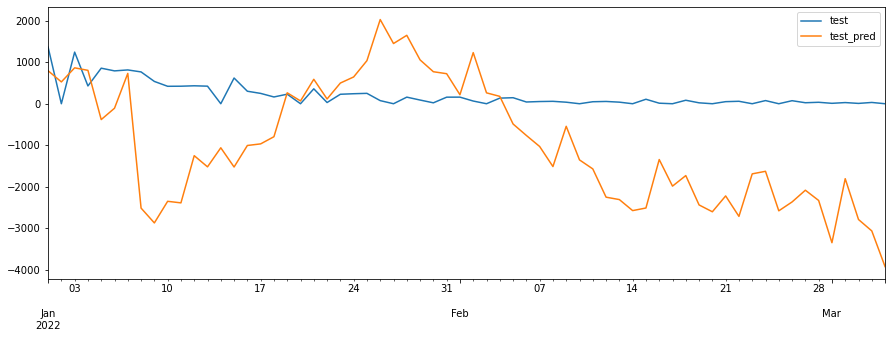

In [213]:
pd.concat([Nigeria_test_scaled['new_cases'], test_pred['yhat']], axis=1).plot(figsize=(15, 5))
plt.legend(['test', 'test_pred'])


### CHINA

In [214]:
China_train_imputed.index = pd.to_datetime(China_train_imputed.index)
China_test_imputed.index = pd.to_datetime(China_test_imputed.index)


In [215]:
# Drop Columns that are constant for all dates as they will have no effect on data
# Fix Lag Columns so values at beginning ar 0 not NaN and values in test dataset are those of last values in train
China_train_imputed = China_train_imputed.drop(columns=['iso_code', 'population_density'
                                                                             ,'median_age', 'aged_65_older', 'aged_70_older',
                                                                             'gdp_per_capita','extreme_poverty',
                                                                              'cardiovasc_death_rate','hospital_beds_per_thousand',
                                                                             'life_expectancy','human_development_index','total_cases',
                                                                             'location', 'continent', 'population', 'reproduction_rate', 'new_cases_smoothed',
                                                                             'total_cases_per_million', 'new_cases_per_million', 'new_cases_smoothed_per_million', 'Rolling_Mean_new_cases'])
China_train_imputed['new_cases_Lag_7'] = China_train_imputed['new_cases_Lag_7'].fillna(0)
China_train_imputed['new_cases_Lag_14'] = China_train_imputed['new_cases_Lag_14'].fillna(0)
China_train_imputed["Weekend"] = China_train_imputed["Weekend"].astype(int)


China_test_imputed = China_test_imputed.drop(columns=['iso_code', 'population_density'
                                                                             ,'median_age', 'aged_65_older', 'aged_70_older',
                                                                             'gdp_per_capita','extreme_poverty',
                                                                              'cardiovasc_death_rate','hospital_beds_per_thousand',
                                                                             'life_expectancy','human_development_index','total_cases',
                                                                             'location', 'continent', 'population', 'reproduction_rate', 'new_cases_smoothed',
                                                                           'total_cases_per_million', 'new_cases_per_million', 'new_cases_smoothed_per_million', 'Rolling_Mean_new_cases'])
China_test_imputed['new_cases_Lag_7'][0:7] = China_train_imputed['new_cases'][-7:]
China_test_imputed['new_cases_Lag_14'][0:14] = China_train_imputed['new_cases'][-14:]
China_test_imputed["Weekend"] = China_test_imputed["Weekend"].astype(int)


In [216]:
# SCALE DATA
China_train_target = China_train_imputed['new_cases']
China_test_target = China_test_imputed['new_cases']
China_train_imputed = China_train_imputed.drop(columns=['new_cases'])
China_test_imputed = China_test_imputed.drop(columns=['new_cases'])

scalerX = StandardScaler().fit(China_train_imputed)
China_train_scaled = scalerX.transform(China_train_imputed)
China_train_scaled = pd.DataFrame(China_train_scaled, index=China_train_imputed.index, columns=China_train_imputed.columns)
China_test_scaled = scalerX.transform(China_test_imputed)
China_test_scaled = pd.DataFrame(China_test_scaled, index=China_test_imputed.index, columns=China_test_imputed.columns)

China_train_scaled['new_cases'] = China_train_target
China_test_scaled['new_cases'] = China_test_target


In [217]:
# ADD REGRESSORS AND FIT MODEL
model = prophet.Prophet(changepoint_prior_scale= 0.5, seasonality_prior_scale= 1.0, daily_seasonality=True, weekly_seasonality=True, yearly_seasonality=True, seasonality_mode = 'multiplicative', growth='linear')
for col in China_train_scaled.columns:
    if col not in ['date', 'new_cases']:
        model.add_regressor(col)
model=model.fit(China_train_scaled.reset_index().rename(columns={'date':'ds', 'new_cases':'y'}))


17:18:57 - cmdstanpy - INFO - Chain [1] start processing
17:18:57 - cmdstanpy - INFO - Chain [1] done processing


In [218]:
# Make training predictions and Train RMSE
train_pred = model.predict(China_train_scaled.reset_index().rename(columns={'date':'ds', 'new_cases':'y'})).set_index('ds')
rmse = np.sqrt(mean_squared_error(train_pred['yhat'], China_train_scaled['new_cases']))
rmse


196.8703278000443

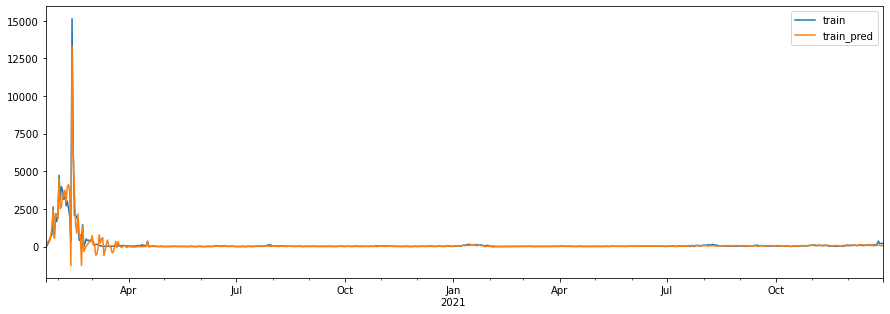

In [219]:
# Train Plot
pd.concat([China_train_scaled['new_cases'], train_pred['yhat']], axis=1).plot(figsize=(15, 5))
plt.legend(['train', 'train_pred'])


In [220]:
# Make testing predictions and Test RMSE
test_pred = model.predict(China_test_scaled.reset_index().rename(columns={'date':'ds', 'new_cases':'y'})).set_index('ds')
rmse = np.sqrt(mean_squared_error(test_pred['yhat'], China_test_scaled['new_cases']))
rmse


81.02218330306947

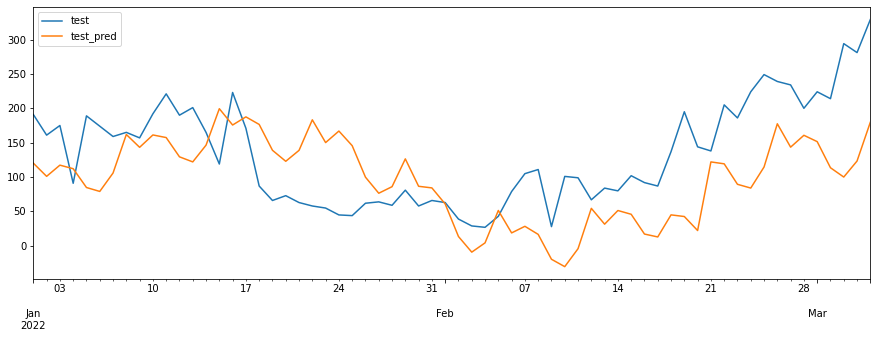

In [221]:
pd.concat([China_test_scaled['new_cases'], test_pred['yhat']], axis=1).plot(figsize=(15, 5))
plt.legend(['test', 'test_pred'])


### AUSTRALIA

In [222]:
Australia_train_imputed.index = pd.to_datetime(Australia_train_imputed.index)
Australia_test_imputed.index = pd.to_datetime(Australia_test_imputed.index)


In [223]:
# Drop Columns that are constant for all dates as they will have no effect on data
# Fix Lag Columns so values at beginning ar 0 not NaN and values in test dataset are those of last values in train
Australia_train_imputed = Australia_train_imputed.drop(columns=['iso_code', 'population_density'
                                                                             ,'median_age', 'aged_65_older', 'aged_70_older',
                                                                             'gdp_per_capita','extreme_poverty',
                                                                              'cardiovasc_death_rate','hospital_beds_per_thousand',
                                                                             'life_expectancy','human_development_index','total_cases',
                                                                             'location', 'continent', 'population', 'reproduction_rate', 'new_cases_smoothed',
                                                                             'total_cases_per_million', 'new_cases_per_million', 'new_cases_smoothed_per_million', 'Rolling_Mean_new_cases'])
Australia_train_imputed['new_cases_Lag_7'] = Australia_train_imputed['new_cases_Lag_7'].fillna(0)
Australia_train_imputed['new_cases_Lag_14'] = Australia_train_imputed['new_cases_Lag_14'].fillna(0)
Australia_train_imputed["Weekend"] = Australia_train_imputed["Weekend"].astype(int)


Australia_test_imputed = Australia_test_imputed.drop(columns=['iso_code', 'population_density'
                                                                             ,'median_age', 'aged_65_older', 'aged_70_older',
                                                                             'gdp_per_capita','extreme_poverty',
                                                                              'cardiovasc_death_rate','hospital_beds_per_thousand',
                                                                             'life_expectancy','human_development_index','total_cases',
                                                                             'location', 'continent', 'population', 'reproduction_rate', 'new_cases_smoothed',
                                                                           'total_cases_per_million', 'new_cases_per_million', 'new_cases_smoothed_per_million', 'Rolling_Mean_new_cases'])
Australia_test_imputed['new_cases_Lag_7'][0:7] = Australia_train_imputed['new_cases'][-7:]
Australia_test_imputed['new_cases_Lag_14'][0:14] = Australia_train_imputed['new_cases'][-14:]
Australia_test_imputed["Weekend"] = Australia_test_imputed["Weekend"].astype(int)


In [224]:
# SCALE DATA
Australia_train_target = Australia_train_imputed['new_cases']
Australia_test_target = Australia_test_imputed['new_cases']
Australia_train_imputed = Australia_train_imputed.drop(columns=['new_cases'])
Australia_test_imputed = Australia_test_imputed.drop(columns=['new_cases'])

scalerX = StandardScaler().fit(Australia_train_imputed)
Australia_train_scaled = scalerX.transform(Australia_train_imputed)
Australia_train_scaled = pd.DataFrame(Australia_train_scaled, index=Australia_train_imputed.index, columns=Australia_train_imputed.columns)
Australia_test_scaled = scalerX.transform(Australia_test_imputed)
Australia_test_scaled = pd.DataFrame(Australia_test_scaled, index=Australia_test_imputed.index, columns=Australia_test_imputed.columns)

Australia_train_scaled['new_cases'] = Australia_train_target
Australia_test_scaled['new_cases'] = Australia_test_target


In [225]:
# ADD REGRESSORS AND FIT MODEL
model = prophet.Prophet(changepoint_prior_scale= 0.5, seasonality_prior_scale= 10.0, daily_seasonality=False, weekly_seasonality=True, yearly_seasonality=True, seasonality_mode = 'multiplicative', growth='linear')
for col in Australia_train_scaled.columns:
    if col not in ['date', 'new_cases']:
        model.add_regressor(col)
model=model.fit(Australia_train_scaled.reset_index().rename(columns={'date':'ds', 'new_cases':'y'}))


17:19:15 - cmdstanpy - INFO - Chain [1] start processing
17:19:17 - cmdstanpy - INFO - Chain [1] done processing


In [226]:
# Make training predictions and Train RMSE
train_pred = model.predict(Australia_train_scaled.reset_index().rename(columns={'date':'ds', 'new_cases':'y'})).set_index('ds')
rmse = np.sqrt(mean_squared_error(train_pred['yhat'], Australia_train_scaled['new_cases']))
rmse


249.2963400590683

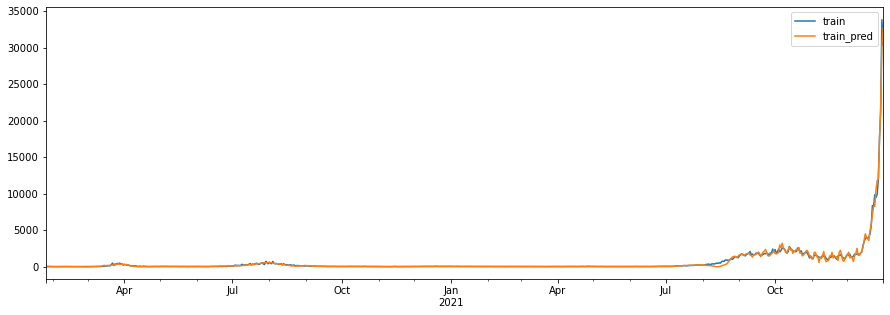

In [227]:
# Train Plot
pd.concat([Australia_train_scaled['new_cases'], train_pred['yhat']], axis=1).plot(figsize=(15, 5))
plt.legend(['train', 'train_pred'])


In [228]:
# Make testing predictions and Test RMSE
test_pred = model.predict(Australia_test_scaled.reset_index().rename(columns={'date':'ds', 'new_cases':'y'})).set_index('ds')
rmse = np.sqrt(mean_squared_error(test_pred['yhat'], Australia_test_scaled['new_cases']))
rmse


177456.30820633462

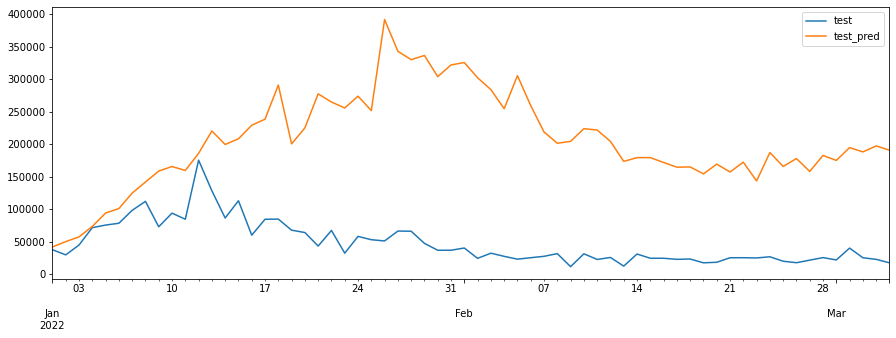

In [229]:
pd.concat([Australia_test_scaled['new_cases'], test_pred['yhat']], axis=1).plot(figsize=(15, 5))
plt.legend(['test', 'test_pred'])
